# Plot frequency errors by delay type for simulated H3N2-like populations 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("ticks")

## Compare tip frequencies

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [3]:
no_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_no_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [4]:
ideal_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_ideal_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [5]:
realistic_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_realistic_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [6]:
no_delay_tips.shape

(61397, 4)

In [7]:
ideal_delay_tips.shape

(53651, 4)

In [8]:
realistic_delay_tips.shape

(39840, 4)

In [9]:
no_delay_tips.head()

,strain,clade_membership,timepoint,frequency
0,sample_3236_14,236287d,2016-10-01,0.000013
1,sample_3236_17,607c9ba,2016-10-01,0.000013
2,sample_3236_19,025b499,2016-10-01,0.000013
3,sample_3236_21,236287d,2016-10-01,0.000013
4,sample_3236_22,3eef392,2016-10-01,0.000013


In [10]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [11]:
tips.head(10)

,strain,clade_membership,timepoint,frequency,clade_membership_ideal,frequency_ideal,clade_membership_realistic,frequency_realistic
0,sample_3236_14,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
1,sample_3236_17,607c9ba,2016-10-01,0.000013,607c9ba,0.000021,607c9ba,0.00005
2,sample_3236_19,025b499,2016-10-01,0.000013,025b499,0.000021,025b499,0.00005
3,sample_3236_21,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
4,sample_3236_22,3eef392,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
5,sample_3236_32,6154421,2016-10-01,0.000013,6154421,0.000021,6154421,0.00005
6,sample_3236_35,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
7,sample_3236_39,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
8,sample_3236_43,025b499,2016-10-01,0.000013,025b499,0.000021,025b499,0.00005
9,sample_3236_44,f40963d,2016-10-01,0.000013,f40963d,0.000021,f40963d,0.00005


In [12]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [13]:
total_tips_no_delay

61397

In [14]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [15]:
total_tips_ideal_delay

51214

In [16]:
total_tips_ideal_delay / total_tips_no_delay

0.834144990797596

In [17]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [18]:
total_tips_realistic_delay

33973

In [19]:
total_tips_realistic_delay / total_tips_no_delay

0.5533332247503949

In [20]:
tips = tips.fillna(0.0)

In [21]:
tips

,strain,clade_membership,timepoint,frequency,clade_membership_ideal,frequency_ideal,clade_membership_realistic,frequency_realistic
0,sample_3236_14,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
1,sample_3236_17,607c9ba,2016-10-01,0.000013,607c9ba,0.000021,607c9ba,0.00005
2,sample_3236_19,025b499,2016-10-01,0.000013,025b499,0.000021,025b499,0.00005
3,sample_3236_21,236287d,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
4,sample_3236_22,3eef392,2016-10-01,0.000013,236287d,0.000021,236287d,0.00005
...,...,...,...,...,...,...,...,...
61392,sample_8148_7,8bfbb72,2040-10-01,0.004379,0.0,0.000000,0.0,0.00000
61393,sample_8148_73,323244c,2040-10-01,0.004379,0.0,0.000000,0.0,0.00000
61394,sample_8148_81,c208787,2040-10-01,0.004379,0.0,0.000000,0.0,0.00000
61395,sample_8148_87,117d293,2040-10-01,0.004379,0.0,0.000000,0.0,0.00000


In [22]:
max_frequency = tips.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [23]:
max_frequency_threshold = max_frequency + (max_frequency / 10)

In [24]:
x = y = np.linspace(0, max_frequency_threshold, 10)

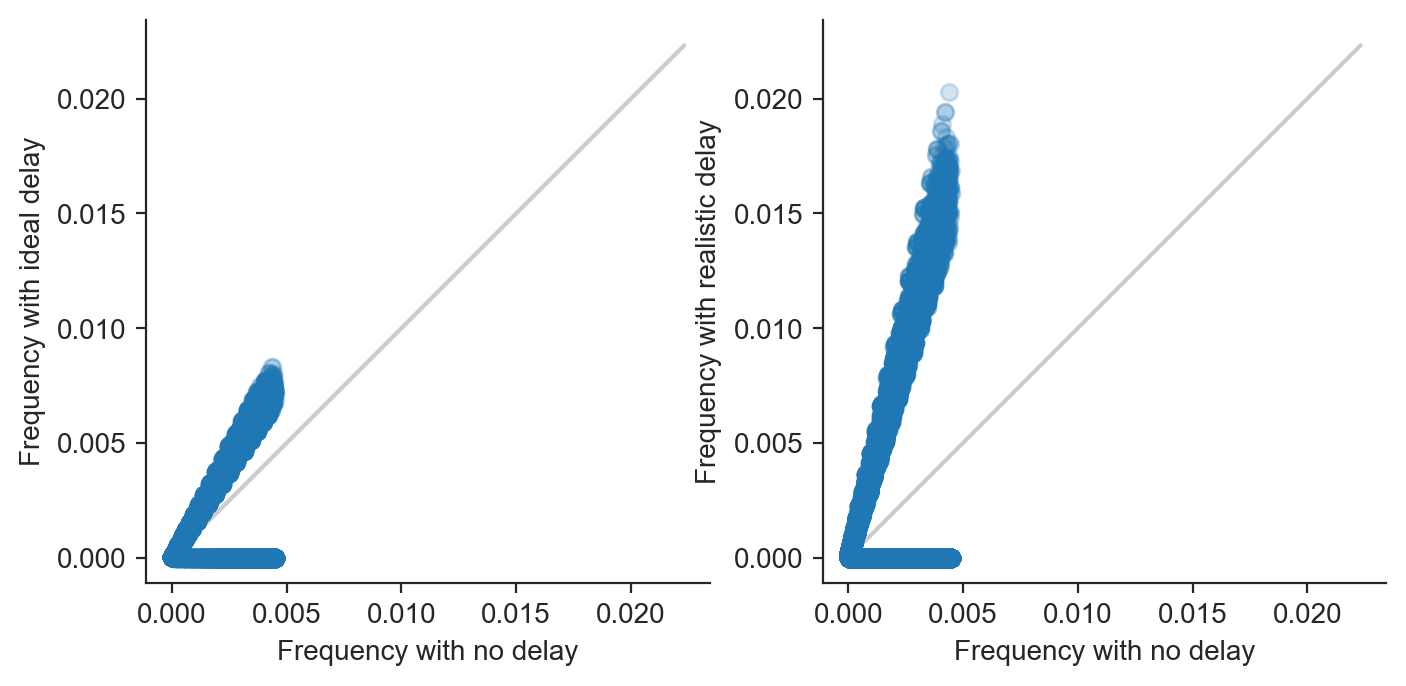

In [70]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.2,
)

axes[0].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[0].set_aspect('equal', 'box')

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.2,
)

axes[1].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

axes[1].set_aspect('equal', 'box')

sns.despine()

## Compare clade frequencies

In [26]:
clades = tips.groupby(["timepoint", "clade_membership"]).agg({
    "frequency": "sum",
    "frequency_ideal": "sum",
    "frequency_realistic": "sum",
})

In [27]:
clades

frequency  frequency_ideal  frequency_realistic
timepoint  clade_membership                                                 
2016-10-01 00fecc0            0.000819         0.001396             0.003247
           0207ea8            0.003637         0.006214             0.006648
           025b499            0.000026         0.000042             0.000100
           0442976            0.002118         0.003618             0.000618
           07c5612            0.000281         0.000480             0.001115
...                                ...              ...                  ...
2040-10-01 f7f02bb            0.000328         0.000522             0.001267
           f7f044d            0.006474         0.010298             0.012514
           f86ee87            0.002607         0.004147             0.005509
           f8adb94            0.007029         0.005149             0.012514
           ff966b8            0.004592         0.007306             0.000000

[14361 rows x 3 columns]

In [28]:
max_clade_frequency = clades.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [29]:
max_clade_frequency_threshold = max_clade_frequency + (max_clade_frequency / 10)

In [30]:
x_clades = y_clades = np.linspace(0, max_clade_frequency_threshold, 10)

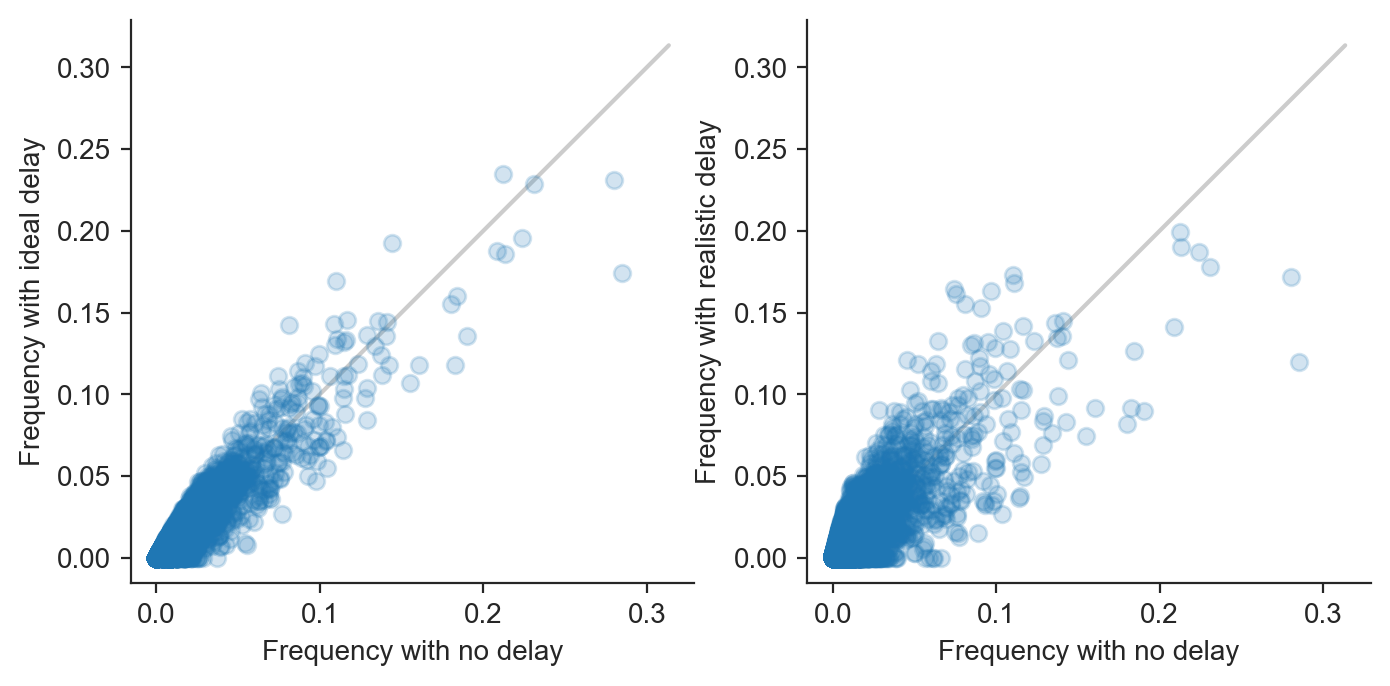

In [32]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    clades["frequency"],
    clades["frequency_ideal"],
    "o",
    alpha=0.2,
)

axes[0].plot(
    x_clades,
    y_clades,
    color="#CCCCCC",
    zorder=-10,
)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[0].set_aspect('equal', 'box')

axes[1].plot(
    clades["frequency"],
    clades["frequency_realistic"],
    "o",
    alpha=0.2,
)

axes[1].plot(
    x_clades,
    y_clades,
    color="#CCCCCC",
    zorder=-10,
)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

axes[1].set_aspect('equal', 'box')

sns.despine()

In [33]:
clades["ideal_error"] = clades["frequency"] - clades["frequency_ideal"]

In [34]:
clades["realistic_error"] = clades["frequency"] - clades["frequency_realistic"]

In [35]:
bins_min = min(clades["ideal_error"].min(), clades["realistic_error"].min())

In [36]:
bins_max = max(clades["ideal_error"].max(), clades["realistic_error"].max())

In [37]:
bins_min

-0.090303

In [38]:
bins_max

0.16524399999999997

In [43]:
bins = np.arange(-0.04, 0.04, 0.005)

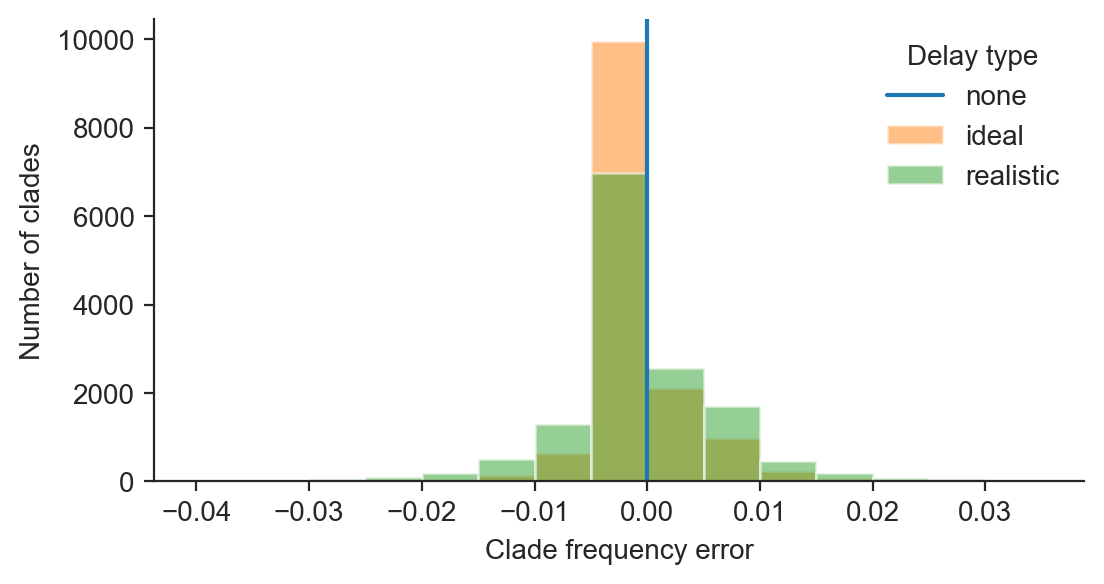

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

ax.axvline(
    x=0,
    label="none",
    color="C0",
)

ax.hist(
    clades["ideal_error"],
    bins=bins,
    label="ideal",
    alpha=0.5,
    color="C1",
)

ax.hist(
    clades["realistic_error"],
    bins=bins,
    label="realistic",
    alpha=0.5,
    color="C2",
)

ax.set_xlabel("Clade frequency error")
ax.set_ylabel("Number of clades")

ax.legend(
    title="Delay type",
    frameon=False,
)

sns.despine()

In [45]:
clades["ideal_error"].median()

-0.000216

In [46]:
clades["ideal_error"].mean()

2.069911566046931e-06

In [47]:
clades["ideal_error"].std()

0.005069655506279925

In [48]:
clades["ideal_error"].var()

2.570140695235437e-05

In [49]:
clades["realistic_error"].median()

-0.00020500000000000032

In [50]:
clades["realistic_error"].mean()

8.155003133486543e-06

In [51]:
clades["realistic_error"].std()

0.008594752513046129

In [52]:
clades["realistic_error"].var()

7.386977076051274e-05

In [53]:
clades["realistic_error"].var() / clades["ideal_error"].var()

2.8741528001736856

In [73]:
bins = np.arange(bins_min, bins_max + 0.01, 0.005)

In [74]:
large_clades = clades.query("frequency >= 0.05")

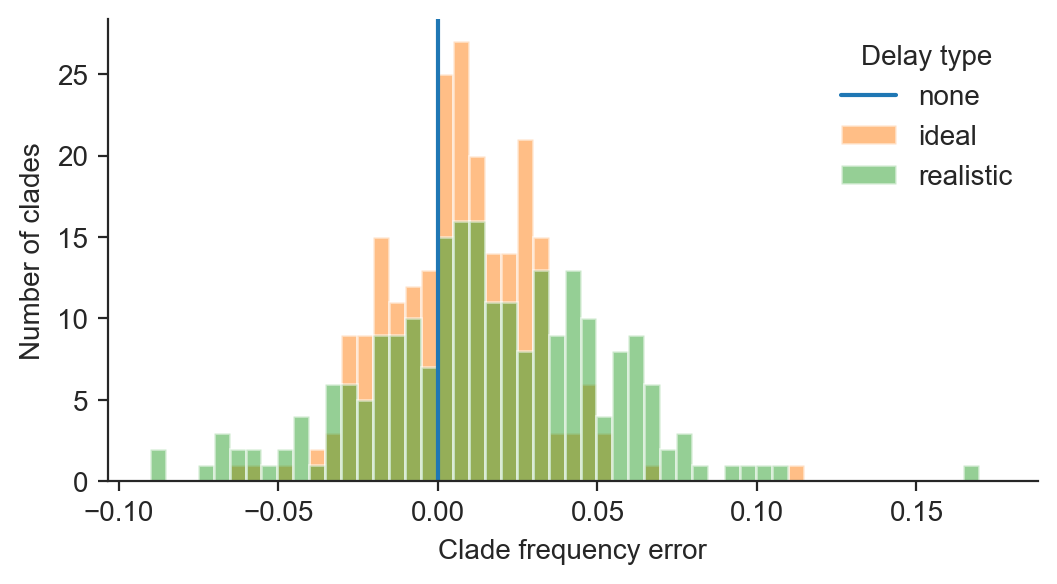

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

ax.axvline(
    x=0,
    label="none",
    color="C0",
)

ax.hist(
    large_clades["ideal_error"],
    bins=bins,
    label="ideal",
    alpha=0.5,
    color="C1",
)

ax.hist(
    large_clades["realistic_error"],
    bins=bins,
    label="realistic",
    alpha=0.5,
    color="C2",
)

ax.set_xlabel("Clade frequency error")
ax.set_ylabel("Number of clades")

ax.legend(
    title="Delay type",
    frameon=False,
)

sns.despine()

In [76]:
large_clades["ideal_error"].median()

0.0062095

In [77]:
large_clades["ideal_error"].mean()

0.007013565217391305

In [78]:
large_clades["ideal_error"].std()

0.022623129351846984

In [79]:
large_clades["ideal_error"].var()

0.0005118059816704006

In [80]:
large_clades["realistic_error"].median()

0.013412499999999997

In [81]:
large_clades["realistic_error"].mean()

0.01518708695652174

In [82]:
large_clades["realistic_error"].std()

0.037368345331955766

In [83]:
large_clades["realistic_error"].var()

0.0013963932328483004

In [84]:
large_clades["realistic_error"].var() / large_clades["ideal_error"].var()

2.7283644249151577

In [85]:
large_clades

frequency  frequency_ideal  frequency_realistic  \
timepoint  clade_membership                                                    
2016-10-01 492db2b            0.055093         0.048320             0.067988   
           539d848            0.128767         0.084213             0.069185   
           a54b235            0.090290         0.078491             0.117118   
           e217919            0.058047         0.057617             0.041591   
2017-01-01 539d848            0.096751         0.116998             0.162927   
...                                ...              ...                  ...   
2040-07-01 a497755            0.062980         0.034624             0.023392   
           e65134a            0.051392         0.045862             0.042447   
2040-10-01 584f7f8            0.073095         0.091115             0.093220   
           a497755            0.086490         0.098405             0.075100   
           a4f5eae            0.085360         0.062718             0.072814   

                             ideal_error  realistic_error  
timepoint  clade_membership                                
2016-10-01 492db2b              0.006773        -0.012895  
           539d848              0.044554         0.059582  
           a54b235              0.011799        -0.026828  
           e217919              0.000430         0.016456  
2017-01-01 539d848             -0.020247        -0.066176  
...                                  ...              ...  
2040-07-01 a497755              0.028356         0.039588  
           e65134a              0.005530         0.008945  
2040-10-01 584f7f8             -0.018020        -0.020125  
           a497755             -0.011915         0.011390  
           a4f5eae              0.022642         0.012546  

[230 rows x 5 columns]

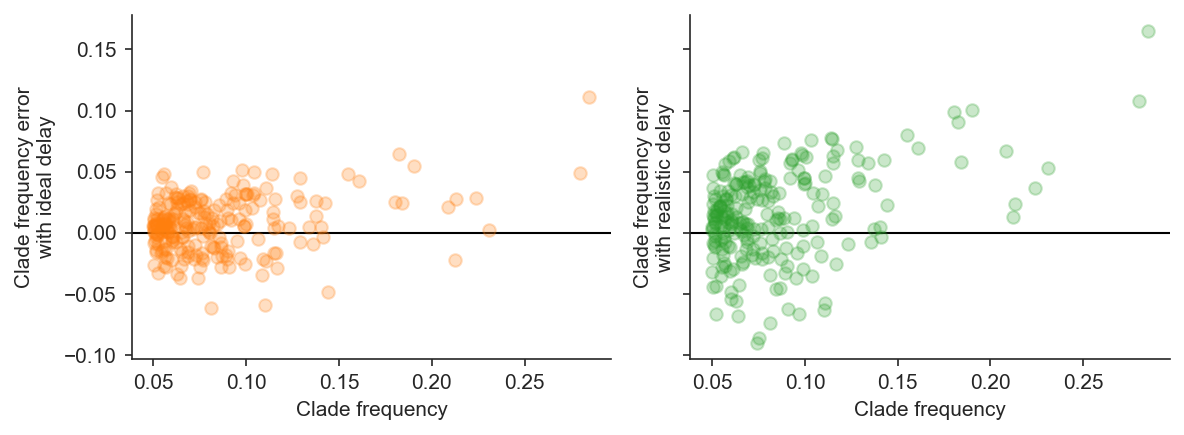

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), dpi=150, sharex=True, sharey=True)

ax1.plot(
    large_clades["frequency"],
    large_clades["ideal_error"],
    "o",
    alpha=0.25,
    color="C1",
)
ax1.axhline(y=0, color="#000000", zorder=-10, linewidth=1)

ax1.set_xlabel("Clade frequency")
ax1.set_ylabel("Clade frequency error\nwith ideal delay")

ax2.plot(
    large_clades["frequency"],
    large_clades["realistic_error"],
    "o",
    alpha=0.25,
    color="C2",
)
ax2.axhline(y=0, color="#000000", zorder=-10, linewidth=1)

ax2.set_xlabel("Clade frequency")
ax2.set_ylabel("Clade frequency error\nwith realistic delay")

sns.despine()

plt.tight_layout()